In [1]:
pwd

'C:\\Users\\nisar\\OneDrive\\Desktop\\Depaul\\CSC_424-AdvanceDataAnalysis\\Final Project'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing

import numpy as np
import pandas as pd
import sys
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from pandas import DataFrame, read_csv
from sklearn import preprocessing

In [3]:
sys.version

'3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]'

In [4]:
pd.set_option('display.max_columns', 500)
car_data=pd.read_csv("Automobile.csv")
car_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Label Encode to create Dummy Variables.

In [5]:
from sklearn.preprocessing import LabelEncoder

list_of_feaatures_to_encode = ['make','fuel_type','aspiration','number_of_doors','body_style','drive_wheels','engine_location','engine_type','number_of_cylinders','fuel_system']
le = LabelEncoder()

for i in list_of_feaatures_to_encode:
    enc = le.fit(np.unique(car_data[i].values))
    print(enc.classes_)
    car_data[i] = le.fit_transform(car_data[i])

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['diesel' 'gas']
['std' 'turbo']
['four' 'two']
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
['4wd' 'fwd' 'rwd']
['front' 'rear']
['dohc' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
['eight' 'five' 'four' 'six' 'three' 'twelve' 'two']
['1bbl' '2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi']


In [6]:
for i in list_of_feaatures_to_encode:
    enc = le.fit(np.unique(car_data[i].values))
    print(enc.classes_)
    car_data[i] = le.fit_transform(car_data[i])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[0 1]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1 2]
[0 1]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6 7]


In [7]:
car_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450


# Scatterplot 

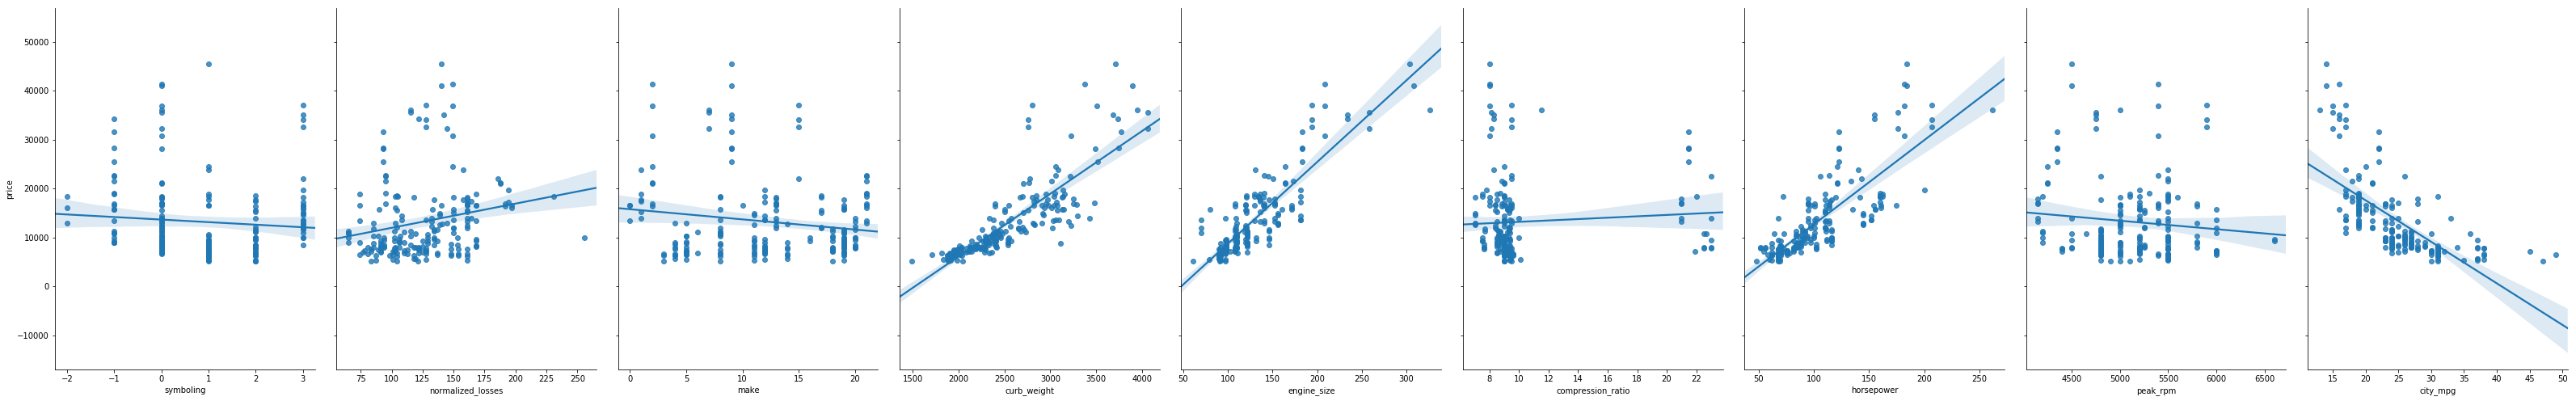

In [8]:
sns.pairplot(car_data, x_vars=['symboling','normalized_losses','make','curb_weight','engine_size','compression_ratio','horsepower','peak_rpm','city_mpg'], y_vars='price', size=7, aspect=0.7, kind='reg')

# Model Buliding 
Checking for VIF variables, Linear Regression,
Training and Testing the data

In [9]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [10]:
vif_cal(input_data=car_data, dependent_col="price")

symboling  VIF =  3.47
normalized_losses  VIF =  2.36
make  VIF =  1.59
fuel_type  VIF =  112.56
aspiration  VIF =  3.97
number_of_doors  VIF =  2.96
body_style  VIF =  2.97
drive_wheels  VIF =  3.0
engine_location  VIF =  1.89
wheel_base  VIF =  11.33
length  VIF =  12.81
width  VIF =  8.54
height  VIF =  3.31
curb_weight  VIF =  19.35
engine_type  VIF =  1.75
number_of_cylinders  VIF =  2.91
engine_size  VIF =  18.63
fuel_system  VIF =  2.74
bore  VIF =  2.55
stroke  VIF =  1.68
compression_ratio  VIF =  103.85
horsepower  VIF =  21.95
peak_rpm  VIF =  2.88
city_mpg  VIF =  32.25
highway_mpg  VIF =  28.33


In [11]:
feature_cols4 = ['horsepower','make','wheel_base','fuel_type','aspiration','width','price']
X4 = car_data[feature_cols4]

vif_cal(input_data = X4 ,dependent_col = "price")

horsepower  VIF =  2.2
make  VIF =  1.03
wheel_base  VIF =  3.28
fuel_type  VIF =  1.6
aspiration  VIF =  1.38
width  VIF =  4.71


In [12]:
feature_cols = ['normalized_losses','number_of_doors','make','engine_location','wheel_base','number_of_cylinders','engine_size','stroke','compression_ratio','horsepower','peak_rpm']
X = car_data[feature_cols]
print(type(X))
print(X.shape)

Y = car_data['price']
print(type(Y))
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
(201, 11)
<class 'pandas.core.series.Series'>
(201,)


In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(150, 11)
(51, 11)
(150,)
(51,)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(reg.intercept_)
print(reg.coef_)

-37328.4111244
[ -3.49504644e+00   6.78272867e+02  -1.99311909e+02   1.18732862e+04
   3.70725552e+02  -4.05526367e+00   9.45434651e+01  -2.31621055e+03
   1.48183953e+02   5.06200188e+01   1.02773091e+00]


In [16]:
list(zip(feature_cols, reg.coef_))

[('normalized_losses', -3.4950464425858883),
 ('number_of_doors', 678.27286709110604),
 ('make', -199.31190852432863),
 ('engine_location', 11873.286234894256),
 ('wheel_base', 370.72555217490998),
 ('number_of_cylinders', -4.0552636677921692),
 ('engine_size', 94.543465053157433),
 ('stroke', -2316.2105460421722),
 ('compression_ratio', 148.183953148782),
 ('horsepower', 50.620018798522082),
 ('peak_rpm', 1.0277309124264027)]

# Making Predictions 

In [17]:
Y_pred = reg.predict(X_test)

In [18]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

2922.48852322


In [19]:
feature_cols = ['horsepower','make','wheel_base','number_of_cylinders','fuel_type','aspiration','drive_wheels','engine_location','engine_type','length','width']
#'wheel_base','number_of_cylinders','fuel_type','aspiration','drive_wheels','engine_location','engine_type','length','width'
# use the list to select a subset of the original DataFrame
X = car_data[feature_cols]

# select a Series from the DataFrame
Y = car_data.price

# split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1,test_size = 0.2)
print(reg.intercept_)
print(reg.coef_)

# fit the model to the training data (learn the coefficients)
model=reg.fit(X_train, Y_train)

# make predictions on the testing set
Y_pred = reg.predict(X_test)

# compute the RMSE of our predictions

print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

-37328.4111244
[ -3.49504644e+00   6.78272867e+02  -1.99311909e+02   1.18732862e+04
   3.70725552e+02  -4.05526367e+00   9.45434651e+01  -2.31621055e+03
   1.48183953e+02   5.06200188e+01   1.02773091e+00]
3141.12809934


In [20]:
Y_pred

array([ 11463.31622664,   5622.67919038,  11477.12717092,   9208.94999161,
        14463.4890052 ,   4368.66749699,  16166.14270312,  10281.45493329,
        17249.35821271,   8102.46028418,  11466.58701522,   9274.69510495,
        14463.4890052 ,  17309.16570229,   8479.88717953,  16059.71298878,
         3987.13795462,  16527.6162797 ,   6390.06024005,   8500.08882283,
        11133.37469089,   6583.09476572,  30411.73501811,  15793.84631087,
         6307.37271459,  27324.02422183,  14463.4890052 ,   6753.71549231,
        11466.58701522,   6410.06049637,  16167.7997256 ,  13252.56303599,
        13127.37477524,   6390.06024005,  19405.75692485,  15061.45224133,
        10739.19267833,   9251.16581193,  20411.70212564,  27040.50922744,
         8595.10485102])

In [21]:
## try predicting manually

reg.predict([[111,0,88.6,0,0,0,0,0,0,168.8,64.0]])

array([ 16850.16626963])

Accuracy Score =  0.813821367411


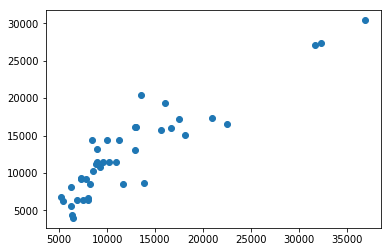

In [22]:
plt.scatter(Y_test,Y_pred)
#plt.xlabel(“True Values”)
#plt.ylabel(“Predictions”)
print ("Accuracy Score = " , model.score(X_test, Y_test))

# Making Prediction_2

In [23]:
feature_cols5 = ['horsepower','make','wheel_base','fuel_type','aspiration','width']
#'wheel_base','number_of_cylinders','fuel_type','aspiration','drive_wheels','engine_location','engine_type','length','width'
# use the list to select a subset of the original DataFrame
X5 = car_data[feature_cols5]

# select a Series from the DataFrame
Y5 = car_data.price

# split into training and testing sets
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, random_state=1,test_size = 0.2)
print(reg.intercept_)
print(reg.coef_)

# fit the model to the training data (learn the coefficients)
model5=reg.fit(X5_train, Y5_train)

# make predictions on the testing set
Y5_pred = reg.predict(X5_test)

# compute the RMSE of our predictions

print(np.sqrt(metrics.mean_squared_error(Y5_test, Y5_pred)))

-49075.5568335
[  1.32933339e+02  -1.88655060e+02   2.80605139e+02  -1.49402543e+03
  -4.15183230e+03  -3.26194673e+03   1.28674788e+03   1.06349140e+04
   8.39433392e+02   4.08168496e+00   4.00304981e+02]
3150.22586666


Accuracy Score: 0.812741333264


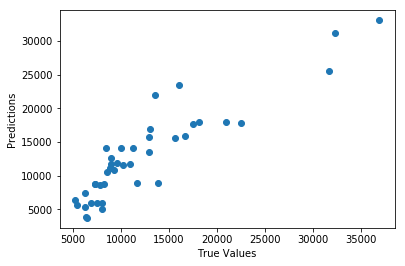

In [24]:
plt.scatter(Y5_test,Y5_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print ("Accuracy Score:" , model5.score(X5_test, Y5_test))

# Model Summary
Finding the p-values, R-squared, Ajd. R-squared and F-Values.
Also trying to calulate VIF among the variables.

In [25]:
import statsmodels.api as smf
feature_cols2 = ['horsepower','number_of_cylinders','fuel_type','aspiration','width']
X2 = car_data[feature_cols2]
Y2 = car_data['price']
#lm = smf.ols(formula = 'price ~ highway_mpg',data = car_data).fit()
lm2 = smf.OLS(Y2,X2).fit()
lm2.params

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


horsepower              199.775553
number_of_cylinders   -1811.194767
fuel_type             -9152.765236
aspiration            -4770.771809
width                    84.498335
dtype: float64

In [26]:
lm2.pvalues

horsepower             2.240183e-61
number_of_cylinders    4.135655e-07
fuel_type              4.154036e-17
aspiration             2.468468e-08
width                  1.039467e-05
dtype: float64

In [27]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     634.8
Date:                Wed, 06 Jun 2018   Prob (F-statistic):          5.87e-119
Time:                        11:32:15   Log-Likelihood:                -1937.4
No. Observations:                 201   AIC:                             3885.
Df Residuals:                     196   BIC:                             3901.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
horsepower            199.7756      8.179     24.425      0.000     183.645     215.906
number_of_cylinders -1811.1948    345.664     -5.240      0.000   -2492.893   -1129.496
fuel_type           -9152.7652    990.499     -9.241      0.000   -1.11e+04   -7199.361
aspiration          -4770.7718    820.857     -5.812      0.000   -6389.618   -3151.925
width                  84.4983     18.668      4.526      0.000      47.683     121.314
==============================================================================
Omnibus:                       19.034   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.328
Skew:                           0.600   Prob(JB):                     1.92e-06
Kurtosis:                       4.305   Cond. No.                         530.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
feature_cols1 = ['horsepower','make','wheel_base','number_of_cylinders','fuel_type','aspiration','drive_wheels','engine_location','engine_type','length','width']
X1 = car_data[feature_cols1]
Y1 = car_data['price']

In [29]:
lm1 = smf.OLS(Y1,X1).fit()
lm1.params
lm1.pvalues

horsepower             2.019035e-31
make                   5.415515e-08
wheel_base             5.449107e-04
number_of_cylinders    1.632109e-08
fuel_type              1.149467e-10
aspiration             7.591113e-05
drive_wheels           2.252433e-02
engine_location        2.066436e-04
engine_type            6.330715e-04
length                 3.239474e-01
width                  4.880739e-06
dtype: float64

In [30]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     397.9
Date:                Wed, 06 Jun 2018   Prob (F-statistic):          9.38e-125
Time:                        11:32:15   Log-Likelihood:                -1903.8
No. Observations:                 201   AIC:                             3830.
Df Residuals:                     190   BIC:                             3866.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
horsepower            159.0187     11.263     14.119      0.000     136.803     181.235
make                 -216.7673     38.274     -5.664      0.000    -292.264    -141.270
wheel_base            332.3589     94.487      3.518      0.001     145.981     518.737
number_of_cylinders -1892.8741    320.781     -5.901      0.000   -2525.625   -1260.124
fuel_type           -6555.4985    960.561     -6.825      0.000   -8450.232   -4660.765
aspiration          -3095.3682    765.158     -4.045      0.000   -4604.664   -1586.072
drive_wheels         1330.8665    578.592      2.300      0.023     189.577    2472.156
engine_location      8326.8182   2200.453      3.784      0.000    3986.362    1.27e+04
engine_type           998.1954    287.259      3.475      0.001     431.569    1564.822
length                 49.8197     50.377      0.989      0.324     -49.550     149.189
width                -539.1856    114.603     -4.705      0.000    -765.243    -313.128
==============================================================================
Omnibus:                       23.932   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.381
Skew:                           0.625   Prob(JB):                     6.27e-10
Kurtosis:                       4.870   Cond. No.                     2.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
lm5 = smf.OLS(Y5,X5).fit()
lm5.params
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     575.6
Date:                Wed, 06 Jun 2018   Prob (F-statistic):          4.14e-121
Time:                        11:32:18   Log-Likelihood:                -1929.0
No. Observations:                 201   AIC:                             3870.
Df Residuals:                     195   BIC:                             3890.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower   183.3848      7.786     23.553      0.000     168.029     198.740
make        -195.3183     41.298     -4.729      0.000    -276.767    -113.869
wheel_base   364.2305     68.673      5.304      0.000     228.794     499.667
fuel_type  -8019.5219    994.867     -8.061      0.000   -9981.603   -6057.440
aspiration -3837.4299    780.579     -4.916      0.000   -5376.891   -2297.969
width       -476.2200    106.804     -4.459      0.000    -686.860    -265.580
==============================================================================
Omnibus:                       34.774   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.844
Skew:                           0.740   Prob(JB):                     5.10e-20
Kurtosis:                       5.902   Cond. No.                         689.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [38]:
result = stepwise_selection(X,Y)

Add  horsepower                     with p-value 3.58687e-48
Add  width                          with p-value 3.75631e-17
Add  engine_location                with p-value 5.9473e-08
Add  make                           with p-value 5.01065e-06
Add  wheel_base                     with p-value 2.64206e-05
Add  fuel_type                      with p-value 0.00717599
Add  aspiration                     with p-value 7.93279e-05


In [39]:
print('resulting features:')
print(result)

resulting features:
['horsepower', 'width', 'engine_location', 'make', 'wheel_base', 'fuel_type', 'aspiration']


# Cross Validation 

In [40]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2,random_state = 1 )
kf.get_n_splits(X)

print(kf)
KFold(n_splits=2, random_state=1, shuffle=False)

KFold(n_splits=2, random_state=1, shuffle=False)


KFold(n_splits=2, random_state=1, shuffle=False)

In [41]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model5, X5, Y5, cv=3)
print ("Cross-validated scores:", scores)

Cross-validated scores: [ 0.84661308  0.70591048  0.30844597]


Cross-Predicted Accuracy: 0.738970407777


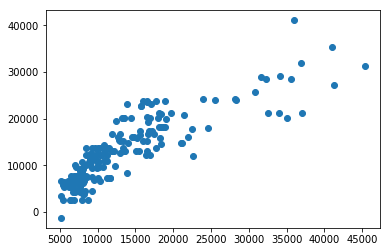

In [42]:
predictions = cross_val_predict(model5, X5, Y5, cv=3)
plt.scatter(Y5, predictions)
accuracy = metrics.r2_score(Y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)